In [1]:
from Library import Algorithm, Cloud, Manifolds
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:

def equation(x, t):
    eq = [0, 0]

    eq[0] = 17.3*math.cos(x[0]) + 7.8*math.cos(x[1]) + 4.5*math.cos(x[2]) - t[0]
    eq[1] = 17.3*math.sin(x[0]) + 7.8*math.sin(x[1]) + 4.5*math.sin(x[2]) - t[1]

    return eq

def equation2(x, t):
    eq = np.zeros(2)

    eq[0] = math.cos(x[0]) + math.cos(x[1])
    eq[1] = math.sin(x[0]) + math.sin(x[1])

    return eq

In [5]:

N = 20

n = 2
m = 1

h = 2*6.14/N

xs = [np.linspace(-3.14, 3.14, N), np.linspace(-3.14, 3.14, N), np.linspace(-3.14, 3.14, N)]
x0s = [np.linspace(-3.14, 3.14, 2), np.linspace(-3.14, 3.14, 2), np.linspace(-3.14, 3.14, 2)]

t = Cloud.carteisan_product([np.linspace(-40, 40, N), np.linspace(-40, 40, N)])

barriers, markers = Algorithm.GetBorders(xs, x0s, t, h, equation, 2)
barriers = np.array(barriers)



 24%|██▎       | 379/1600 [00:35<01:52, 10.82it/s]


KeyboardInterrupt: 

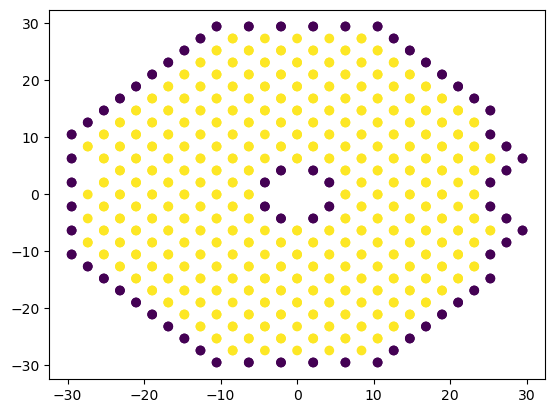

In [4]:

plt.scatter(barriers[:, 0], barriers[:, 1], c = markers)
plt.show()